# Fisher Linear Discriminant

In this exercise, you will apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates three data matrices of size (1528, 7), (1307, 7), and (1342, 7) corresponding to the three classes in the dataset: *male (M)*, *female (F)*, and *infant (I)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots various projections of the data: (1) projection on the first dimension of the data, and (2) projection on a random direction.

((1528, 7), (1307, 7), (1342, 7))


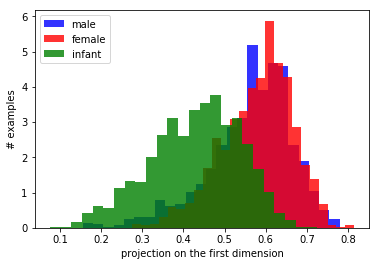

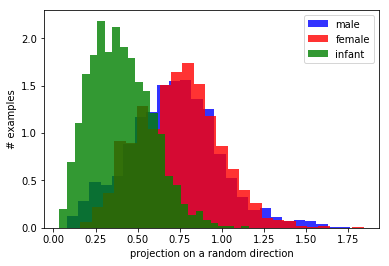

In [1]:
%matplotlib inline
import utils,numpy

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.M.shape,abalone.F.shape, abalone.I.shape)

# Project data on the first dimension
w1 = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension')

# Project data on a random direction
w2 = numpy.random.normal(0,1,[7])
w2 /= (w2**2).sum()**.5
abalone.plot(w2,'projection on a random direction')

## Implementation (30 P)

* **Create a method `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a method `J(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a method `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [111]:
def S_Bet(X1, X2):
    # X1: [D, N]
    # X2: [D, N]
    X1_mean = numpy.mean(X1, axis=1).reshape(X1.shape[0], 1)
    X2_mean = numpy.mean(X2, axis=1).reshape(X2.shape[0], 1)
    return (X1_mean-X2_mean).dot((X1_mean-X2_mean).T)

def S_Within(X1, X2):
    # X1: [D, N]
    # X2: [D, N]
    X1_mean = numpy.mean(X1, axis=1).reshape(X1.shape[0], 1)
    X2_mean = numpy.mean(X2, axis=1).reshape(X2.shape[0], 1)
    S_W = (X1-X1_mean).dot((X1-X1_mean).T) + (X2-X2_mean).dot((X2-X2_mean).T)
    return S_W
    
def fisher(X1, X2):
    # X1: [D, N]
    # X2: [D, N]
    X1_mean = numpy.mean(X1, axis=1).reshape(X1.shape[0], 1)
    X2_mean = numpy.mean(X2, axis=1).reshape(X2.shape[0], 1)
    S_W = S_Within(X1, X2)
    w = numpy.linalg.inv(S_W).dot(X1_mean - X2_mean)
    return w

def J(X1, X2, w):
    # X1: [D, N]
    # X2: [D, N]
    # w: [D, 1]
    X1_mean = numpy.mean(X1, axis=1).reshape(X1.shape[0], 1)
    X2_mean = numpy.mean(X2, axis=1).reshape(X2.shape[0], 1)
    S_B = S_Bet(X1, X2)
    S_W = S_Within(X1, X2)
    J = ((w.T.dot(S_B)).dot(w))/((w.T.dot(S_W)).dot(w))
    return J[0][0]

def phi(X):
    # X: [D, N]
    # return: [D', N]
    expended_X = None
    for i in range(X.shape[1]):
        cur_point = X[:, i].reshape(X.shape[0], 1)
#         x1 = numpy.triu(cur_point.T.dot(cur_point))
        x1 = numpy.triu(cur_point.dot(cur_point.T))[numpy.triu_indices(cur_point.shape[0])]
        x1.reshape(x1.shape[0], 1)
        x_new = numpy.concatenate((X[:, i], x1), axis = 0)
        x_new.reshape(x_new.shape[0], 1)
        if(i == 0):
            expended_X = numpy.array([x_new])
        else:
            expended_X = numpy.vstack((expended_X, [x_new]))
    return expended_X.T
    

## Analysis (20 P)

* **Print the value of `J(w)` for each discriminated pair of classes (M/F, M/I, F/I), and for several values of `w`:**

  * `w` is a vector that projects the data on the each dimension of the data.
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the difference between the mean vectors of the two classes (after quadratic expansion of the data).
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).


* **For the simple Fisher linear discriminant, plot a histogram of the projected data for each discriminated pair of classes using the function `utils.Abalone.plot()`.**

---------------------------------------------------
Dimension0:
  * MF: 0.00001
  * MI: 0.00056
  * FI: 0.00090
Dimension1:
  * MF: 0.00001
  * MI: 0.00060
  * FI: 0.00097
Dimension2:
  * MF: 0.00001
  * MI: 0.00058
  * FI: 0.00072
Dimension3:
  * MF: 0.00001
  * MI: 0.00070
  * FI: 0.00108
Dimension4:
  * MF: 0.00000
  * MI: 0.00060
  * FI: 0.00088
Dimension5:
  * MF: 0.00001
  * MI: 0.00069
  * FI: 0.00109
Dimension6:
  * MF: 0.00001
  * MI: 0.00066
  * FI: 0.00100
---------------------------------------------------
Means Linear:
  * MF: 0.00001
  * MI: 0.00070
  * FI: 0.00108
Means Quadratic:
  * MF: 0.00000
  * MI: 0.00054
  * FI: 0.00083
---------------------------------------------------
Fisher Linear:
  * MF: 0.00004
  * MI: 0.00075
  * FI: 0.00120
Fisher Quadratic:
  * MF: 0.00005
  * MI: 0.00101
  * FI: 0.00154


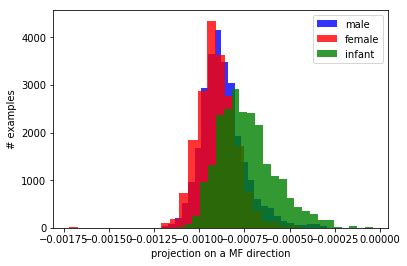

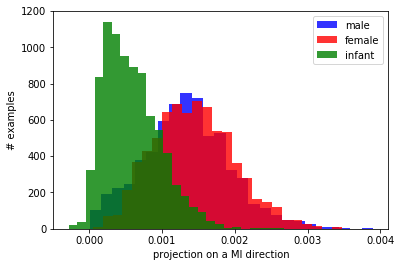

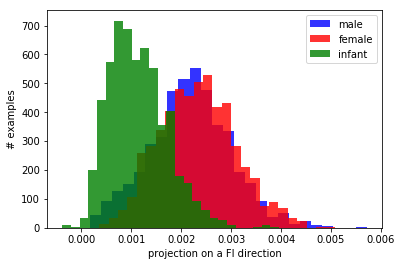

In [112]:
male_data = abalone.M.T
female_data = abalone.F.T
infant_data = abalone.I.T

expended_male_data = phi(abalone.M.T)
expended_female_data = phi(abalone.F.T)
expended_infant_data = phi(abalone.I.T)

male_mean = numpy.mean(male_data, axis=1).reshape(male_data.shape[0], 1)
female_mean = numpy.mean(female_data, axis=1).reshape(female_data.shape[0], 1)
infant_mean = numpy.mean(infant_data, axis=1).reshape(infant_data.shape[0], 1)

expended_male_mean = numpy.mean(expended_male_data, axis=1).reshape(expended_male_data.shape[0], 1)
expended_female_mean = numpy.mean(expended_female_data, axis=1).reshape(expended_female_data.shape[0], 1)
expended_infant_mean = numpy.mean(expended_infant_data, axis=1).reshape(expended_infant_data.shape[0], 1)

#w is a vector that projects the data on the each dimension of the data.
w_dim0 = numpy.array([1, 0, 0, 0, 0, 0, 0]).reshape(7, 1)
w_dim1 = numpy.array([0, 1, 0, 0, 0, 0, 0]).reshape(7, 1)
w_dim2 = numpy.array([0, 0, 1, 0, 0, 0, 0]).reshape(7, 1)
w_dim3 = numpy.array([0, 0, 0, 1, 0, 0, 0]).reshape(7, 1)
w_dim4 = numpy.array([0, 0, 0, 0, 1, 0, 0]).reshape(7, 1)
w_dim5 = numpy.array([0, 0, 0, 0, 0, 1, 0]).reshape(7, 1)
w_dim6 = numpy.array([0, 0, 0, 0, 0, 0, 1]).reshape(7, 1)

# w is the difference between the mean vectors of the two classes.
w_mean_diff_MI = male_mean - infant_mean
w_mean_diff_MF = male_mean - female_mean
w_mean_diff_FI = female_mean - infant_mean

# w is the difference between the mean vectors of the two classes, expended
expended_w_mean_diff_MI = expended_male_mean - expended_infant_mean
expended_w_mean_diff_MF = expended_male_mean - expended_female_mean
expended_w_mean_diff_FI = expended_female_mean - expended_infant_mean


# w is the Fisher linear discriminant.
w_fisher_MI = fisher(male_data, infant_data)
w_fisher_MF = fisher(male_data, female_data)
w_fisher_FI = fisher(female_data, infant_data)

# w is the Fisher linear discriminant, expended
expended_w_fisher_MI = fisher(expended_male_data, expended_infant_data)
expended_w_fisher_MF = fisher(expended_male_data, expended_female_data)
expended_w_fisher_FI = fisher(expended_female_data, expended_infant_data)


print "---------------------------------------------------"
print "Dimension0:"
print "  * MF: %.5f" % J(w_dim0.T.dot(male_data), w_dim0.T.dot(female_data), w_dim0.T.dot(w_dim0))
print "  * MI: %.5f" % J(w_dim0.T.dot(male_data), w_dim0.T.dot(infant_data), w_dim0.T.dot(w_dim0))
print "  * FI: %.5f" % J(w_dim0.T.dot(female_data), w_dim0.T.dot(infant_data), w_dim0.T.dot(w_dim0))

print "Dimension1:"
print "  * MF: %.5f" % J(w_dim1.T.dot(male_data), w_dim1.T.dot(female_data), w_dim1.T.dot(w_dim1))
print "  * MI: %.5f" % J(w_dim1.T.dot(male_data), w_dim1.T.dot(infant_data), w_dim1.T.dot(w_dim1))
print "  * FI: %.5f" % J(w_dim1.T.dot(female_data), w_dim1.T.dot(infant_data), w_dim1.T.dot(w_dim1))
print "Dimension2:"
print "  * MF: %.5f" % J(w_dim2.T.dot(male_data), w_dim2.T.dot(female_data), w_dim2.T.dot(w_dim2))
print "  * MI: %.5f" % J(w_dim2.T.dot(male_data), w_dim2.T.dot(infant_data), w_dim2.T.dot(w_dim2))
print "  * FI: %.5f" % J(w_dim2.T.dot(female_data), w_dim2.T.dot(infant_data), w_dim2.T.dot(w_dim2))
print "Dimension3:"
print "  * MF: %.5f" % J(w_dim3.T.dot(male_data), w_dim3.T.dot(female_data), w_dim3.T.dot(w_dim3))
print "  * MI: %.5f" % J(w_dim3.T.dot(male_data), w_dim3.T.dot(infant_data), w_dim3.T.dot(w_dim3))
print "  * FI: %.5f" % J(w_dim3.T.dot(female_data), w_dim3.T.dot(infant_data), w_dim3.T.dot(w_dim3))
print "Dimension4:"
print "  * MF: %.5f" % J(w_dim4.T.dot(male_data), w_dim4.T.dot(female_data), w_dim4.T.dot(w_dim4))
print "  * MI: %.5f" % J(w_dim4.T.dot(male_data), w_dim4.T.dot(infant_data), w_dim4.T.dot(w_dim4))
print "  * FI: %.5f" % J(w_dim4.T.dot(female_data), w_dim4.T.dot(infant_data), w_dim4.T.dot(w_dim4))
print "Dimension5:"
print "  * MF: %.5f" % J(w_dim5.T.dot(male_data), w_dim5.T.dot(female_data), w_dim5.T.dot(w_dim5))
print "  * MI: %.5f" % J(w_dim5.T.dot(male_data), w_dim5.T.dot(infant_data), w_dim5.T.dot(w_dim5))
print "  * FI: %.5f" % J(w_dim5.T.dot(female_data), w_dim5.T.dot(infant_data), w_dim5.T.dot(w_dim5))
print "Dimension6:"
print "  * MF: %.5f" % J(w_dim6.T.dot(male_data), w_dim6.T.dot(female_data), w_dim6.T.dot(w_dim6))
print "  * MI: %.5f" % J(w_dim6.T.dot(male_data), w_dim6.T.dot(infant_data), w_dim6.T.dot(w_dim6))
print "  * FI: %.5f" % J(w_dim6.T.dot(female_data), w_dim6.T.dot(infant_data), w_dim6.T.dot(w_dim6))

print "---------------------------------------------------"
print "Means Linear:"
print "  * MF: %.5f" % J(male_data, female_data, w_mean_diff_MF)
print "  * MI: %.5f" % J(male_data, infant_data, w_mean_diff_MI)
print "  * FI: %.5f" % J(female_data, infant_data, w_mean_diff_FI)

print "Means Quadratic:"
print "  * MF: %.5f" % J(expended_male_data, expended_female_data, expended_w_mean_diff_MF)
print "  * MI: %.5f" % J(expended_male_data, expended_infant_data, expended_w_mean_diff_MI)
print "  * FI: %.5f" % J(expended_female_data, expended_infant_data, expended_w_mean_diff_FI)

print "---------------------------------------------------"
print "Fisher Linear:"
print "  * MF: %.5f" % J(male_data, female_data, w_fisher_MF)
print "  * MI: %.5f" % J(male_data, infant_data, w_fisher_MI)
print "  * FI: %.5f" % J(female_data, infant_data, w_fisher_FI)


print "Fisher Quadratic:"
print "  * MF: %.5f" % J(expended_male_data, expended_female_data, expended_w_fisher_MF)
print "  * MI: %.5f" % J(expended_male_data, expended_infant_data, expended_w_fisher_MI)
print "  * FI: %.5f" % J(expended_female_data, expended_infant_data, expended_w_fisher_FI)

abalone.plot(w_fisher_MF, "projection on a MF direction")
abalone.plot(w_fisher_MI, "projection on a MI direction")
abalone.plot(w_fisher_FI, "projection on a FI direction")